In [1]:
#Depedencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Creating a set of random lats and longs
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#Add lats and lngs into a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75e94d1457c658e2bf71394dfd6c560e


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 45 of Set 12 | qaanaaq
Processing Record 46 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 47 of Set 12 | touba
Processing Record 48 of Set 12 | bredasdorp
Processing Record 49 of Set 12 | hermanus
Processing Record 50 of Set 12 | ushuaia
Processing Record 51 of Set 12 | the valley
Processing Record 52 of Set 12 | bengkulu
Processing Record 53 of Set 12 | pombal
Processing Record 54 of Set 12 | dikson
Processing Record 55 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 56 of Set 12 | cape town
Processing Record 57 of Set 12 | hithadhoo
Processing Record 58 of Set 12 | namibe
Processing Record 59 of Set 12 | belyy yar
Processing Record 60 of Set 12 | aljezur
Processing Record 61 of Set 12 | labytnangi
Processing Record 62 of Set 12 | busselton
Processing Record 63 of Set 12 | ust-kalmanka
Processing Record 64 of Set 12 | souillac
Processing Record 65 of Set 12 | saint-philippe
Processing Record 66 of Set 12 | abu road
Processing

Processing Record 35 of Set 15 | talara
Processing Record 36 of Set 15 | sarakhs
Processing Record 37 of Set 15 | hofn
Processing Record 38 of Set 15 | wenceslau braz
Processing Record 39 of Set 15 | camacha
Processing Record 40 of Set 15 | barbar
City not found. Skipping...
Processing Record 41 of Set 15 | ambilobe
Processing Record 42 of Set 15 | new glasgow
Processing Record 43 of Set 15 | ashitkovo
Processing Record 44 of Set 15 | bure
Processing Record 45 of Set 15 | baja
Processing Record 46 of Set 15 | mocambique
City not found. Skipping...
Processing Record 47 of Set 15 | kasangulu
Processing Record 48 of Set 15 | kalabo
Processing Record 49 of Set 15 | shilovo
Processing Record 50 of Set 15 | margate
Processing Record 1 of Set 16 | oni
Processing Record 2 of Set 16 | kutum
Processing Record 3 of Set 16 | tiznit
Processing Record 4 of Set 16 | santander
Processing Record 5 of Set 16 | duz
City not found. Skipping...
Processing Record 6 of Set 16 | grand gaube
Processing Record 

Processing Record 21 of Set 19 | amapa
Processing Record 22 of Set 19 | kidal
Processing Record 23 of Set 19 | copiapo
Processing Record 24 of Set 19 | envira
Processing Record 25 of Set 19 | havre-saint-pierre
Processing Record 26 of Set 19 | fasa
Processing Record 27 of Set 19 | alagir
Processing Record 28 of Set 19 | tabou
Processing Record 29 of Set 19 | ust-tsilma
Processing Record 30 of Set 19 | saint-francois
Processing Record 31 of Set 19 | pangody
Processing Record 32 of Set 19 | ankara
Processing Record 33 of Set 19 | bubaque
Processing Record 34 of Set 19 | tsienyane
City not found. Skipping...
Processing Record 35 of Set 19 | sur
Processing Record 36 of Set 19 | luanda
Processing Record 37 of Set 19 | krasnoselkup
Processing Record 38 of Set 19 | uige
Processing Record 39 of Set 19 | santa rosa
Processing Record 40 of Set 19 | maykain
City not found. Skipping...
Processing Record 41 of Set 19 | mukacheve
Processing Record 42 of Set 19 | neuquen
Processing Record 43 of Set 1

Processing Record 8 of Set 23 | grand-lahou
Processing Record 9 of Set 23 | norwalk
Processing Record 10 of Set 23 | pizarro
Processing Record 11 of Set 23 | voznesenye
Processing Record 12 of Set 23 | taguatinga
Processing Record 13 of Set 23 | sept-iles
Processing Record 14 of Set 23 | remedios
Processing Record 15 of Set 23 | kudahuvadhoo
Processing Record 16 of Set 23 | ortigueira
Processing Record 17 of Set 23 | linguere
Processing Record 18 of Set 23 | comodoro rivadavia
Processing Record 19 of Set 23 | oranjestad
Processing Record 20 of Set 23 | yambio
Processing Record 21 of Set 23 | san juan
Processing Record 22 of Set 23 | kargil
Processing Record 23 of Set 23 | warqla
City not found. Skipping...
Processing Record 24 of Set 23 | stepnyak
Processing Record 25 of Set 23 | iranshahr
Processing Record 26 of Set 23 | mogadishu
Processing Record 27 of Set 23 | inderborskiy
City not found. Skipping...
Processing Record 28 of Set 23 | tazovskiy
Processing Record 29 of Set 23 | paignt

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,7.93,74,76,9.55,GL,2020-10-26 21:07:21
1,Touba,8.28,-7.68,74.89,64,97,0.72,CI,2020-10-26 21:07:21
2,Bredasdorp,-34.53,20.04,64.40,82,100,14.99,ZA,2020-10-26 21:07:21
3,Hermanus,-34.42,19.23,64.00,82,85,5.99,ZA,2020-10-26 21:07:22
4,Ushuaia,-54.80,-68.30,51.80,62,40,12.75,AR,2020-10-26 21:05:32
5,The Valley,18.22,-63.06,86.00,74,20,14.99,AI,2020-10-26 21:07:22
6,Bengkulu,-3.80,102.27,74.59,83,100,3.44,ID,2020-10-26 21:07:22
7,Pombal,-6.77,-37.80,91.02,26,0,9.55,BR,2020-10-26 21:07:22
8,Dikson,73.51,80.55,11.50,95,99,15.55,RU,2020-10-26 21:07:22
9,Cape Town,-33.93,18.42,66.99,82,0,6.93,ZA,2020-10-26 21:06:12


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
import time

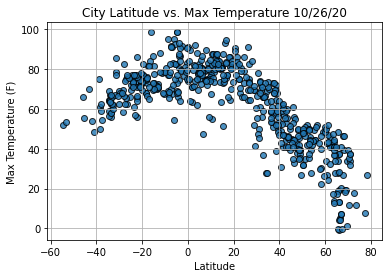

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

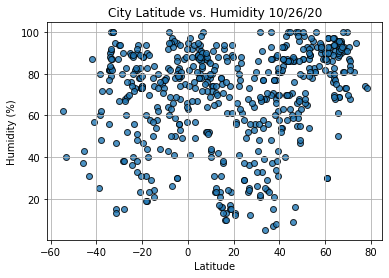

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()